# Data Exploration using Python

In this notebook, I am experimenting with a real estate data set to understand data exploration usig various libraries.

I got this data from Kaggle (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/data). It has a llist of selling prices of houses based on variety of parameters. The objective is to predict sale price of a house based on a trained model.

Before going headfirst into data, it is recommended to go visually go through the data to get a feel. A basic analysis of what variables seem important and which seem unrelated is expected out of this activity

Step 1 - Load data. I am using pandas for reading data from csv file

In [11]:
import pandas as pd

train = pd.read_csv("train.csv", sep = ",")
train.shape

(1460, 81)

As we can see, the data set has 1460 rows and 81 columns.

Let's see first few rows

In [13]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's understand the dynamics of each variable

In [14]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Since I want to predict the SalePrice of each house, I will focus on that variable first

In [15]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As we can see, the mean saleprice is 180921. It ranges from 35 grand to 755 grand. Let's see this visually using a distribution plot

C:\Users\Madhura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


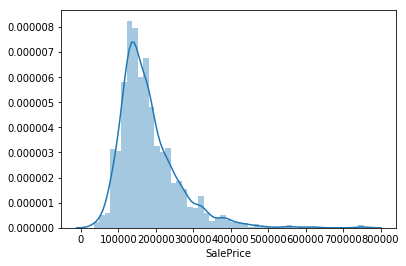

In [22]:
import seaborn as sb

sb.distplot(train['SalePrice'])

Two things should be considered when looking at a distribution plot.

1) Skewness - Distortion from expected normal distribution bell curve. If skew is between -0.5 and 0.5, data is symmetrical. If it is between -1 and -0.5 or between 0.5 and 1, data is moderately skewed

2) Kurtosis - The tail comparison or the measure of the outliers. High kurtosis and too low kurtosis (ideal condition), in both cases data should be investigated

Now let's see the actual values of skew and kurtosis

In [25]:
skew = train['SalePrice'].skew()
print('Data Skewness - ', skew)

kurt = train['SalePrice'].kurt()
print('Data Kurtosis - ', kurt)

Data Skewness -  1.8828757597682129
Data Kurtosis -  6.536281860064529


As it can be seen from above values, data is highly positively skewed. Also, the kurtosis is high

# 

# 

The initial manual analysis that was performed on data resulted in identifying few important variables - those are  
1. GrLivingAre - Total Living area
2. OverallQual - The overall quality of house
3. YearBuilt - the year when home was built
4. BsmtQual - basement quality
5. GarageCars -  The space available for parking multiple cars
6. SaleCondition

Let's try to understand the relationship of these variables with SalePrice.

This can be achieved by a scatterplot

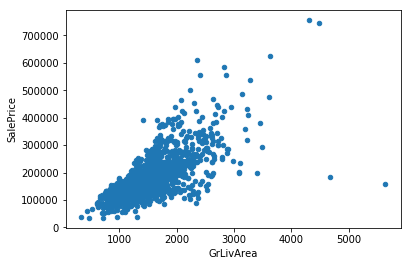

In [27]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

Looks like SalePrice has linear relationship with GrLivArea

Let's look at a categorical variable like OverallQual. This can be achieved by a boxplot.

(-0.5, 9.5, 0, 800000)

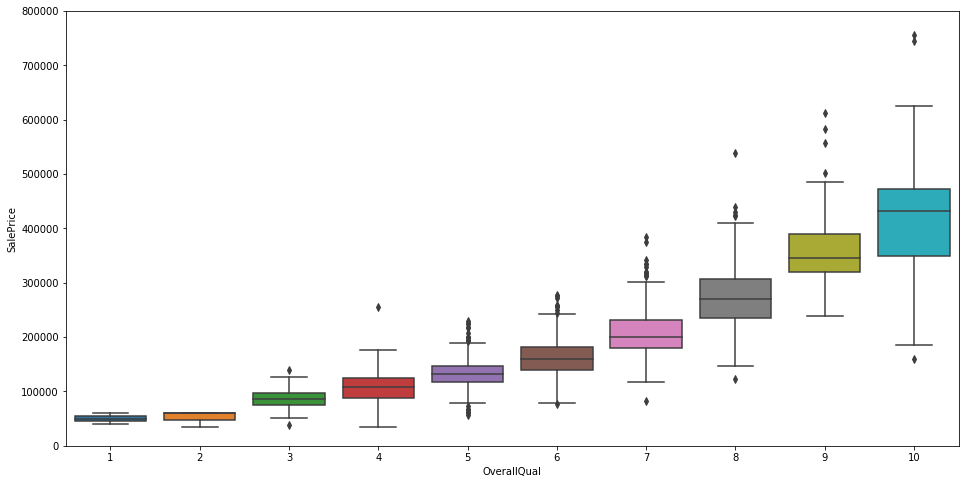

In [33]:
import matplotlib.pyplot as plt

data = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize=(16,8))
fig = sb.boxplot(x = 'OverallQual', y = 'SalePrice', data= data)
fig.axis(ymin = 0, ymax = 800000)

Thus, as overall quality increases, sale price increases